In [1]:
%load_ext autoreload
%autoreload 2

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context(context="talk")
import pickle
import os
from datetime import datetime
import numpy as np
from time import time

import sys
sys.path.insert(0, '/Users/karlhajjar/Documents/projects/wide-networks/')
from utils.data.results import read_experiments_results
from utils.plot.metrics import *

In [31]:
N_TRAINs = [5000, 10000, 1000, 512, 256, 128, 64]
Ds = [512, 1000, 5000, 10000, 256, 128, 50, 25, 20, 15, 10, 5]
Ms = [10, 50, 100, 200, 500, 1000, 2000, 5000]
BATCH_SIZES = [128, 64, 32, 1]

In [7]:
ROOT = '/Users/karlhajjar/Documents/projects/wide-networks/'
EXPERIMENTS_DIR = 'experiments'
MODEL_NAME = 'wide_2_layer'
CONFIG_FILE = 'wide_two_layer_net.yaml'

k, r = 3, 0.5
all_results = None

In [8]:
base_experiment_path = os.path.join(ROOT, EXPERIMENTS_DIR, MODEL_NAME)
base_experiment_path

'/Users/karlhajjar/Documents/projects/wide-networks/experiments/wide_2_layer'

In [15]:
model_config = 'activation=relu_loss=logistic_opt=sgd_init=custom'
k_r_config = 'k={}_r={}'.format(k, r)

In [16]:
base_dir = os.path.join(base_experiment_path, model_config, k_r_config)

In [54]:
start = time()
all_results = read_experiments_results(base_dir, batch_sizes=[128], all_results=all_results, n_trials=5)
end = time()
print('Time for loading results from {:,} experiments : {:.1f} minutes'.format(len(all_results),
                                                                               (end - start) / 60))

Time for loading results from 16 experiments : 1.2 minutes


In [55]:
list(all_results.keys())

['bsize=128_ntrain=5000_d=512_m=10',
 'bsize=128_ntrain=5000_d=512_m=50',
 'bsize=128_ntrain=5000_d=512_m=100',
 'bsize=128_ntrain=5000_d=512_m=200',
 'bsize=128_ntrain=5000_d=512_m=500',
 'bsize=128_ntrain=5000_d=512_m=1000',
 'bsize=128_ntrain=5000_d=512_m=2000',
 'bsize=128_ntrain=5000_d=512_m=5000',
 'bsize=128_ntrain=5000_d=1000_m=10',
 'bsize=128_ntrain=5000_d=1000_m=50',
 'bsize=128_ntrain=5000_d=1000_m=100',
 'bsize=128_ntrain=5000_d=1000_m=200',
 'bsize=128_ntrain=5000_d=1000_m=500',
 'bsize=128_ntrain=5000_d=1000_m=1000',
 'bsize=128_ntrain=5000_d=1000_m=2000',
 'bsize=128_ntrain=5000_d=1000_m=5000']

In [85]:
from utils.plot.metrics import *

# 1) Accuracy

## 1.1 Accuracy vs m

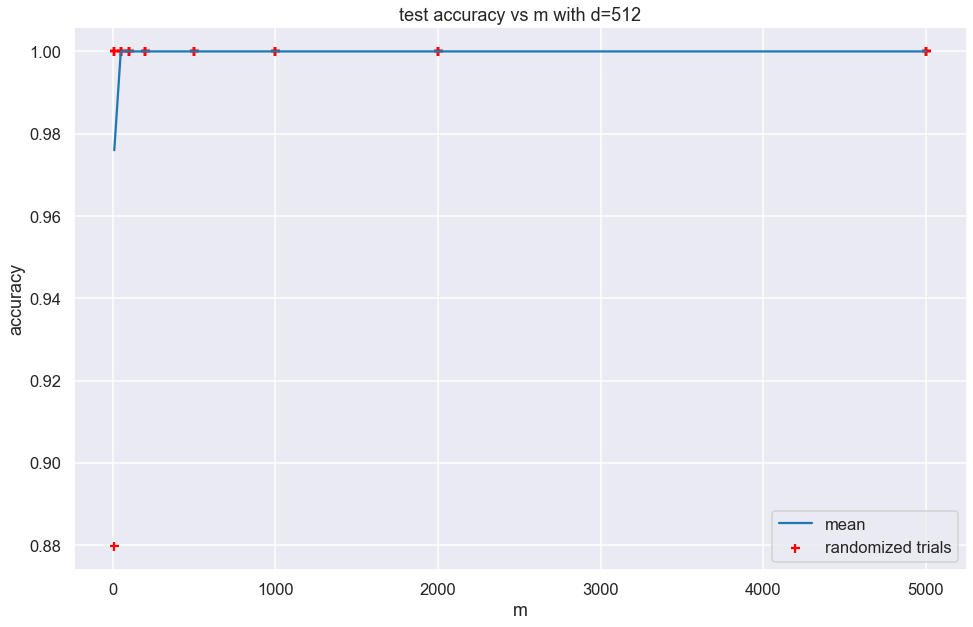

In [69]:
other_params_dict = {'bsize': 128, 'ntrain': 5000, 'm': Ms, 'd': 512}
metric_key = 'accuracy'
param_key = 'm'
param_values = Ms
other_param_key = 'd'

plot_metric_vs_param_from_results(other_params_dict, all_results, metric_key, param_key, param_values, 
                                  other_param_key, figsize=(16, 10))

Metric retrieval failed for m=5000 : list index out of range


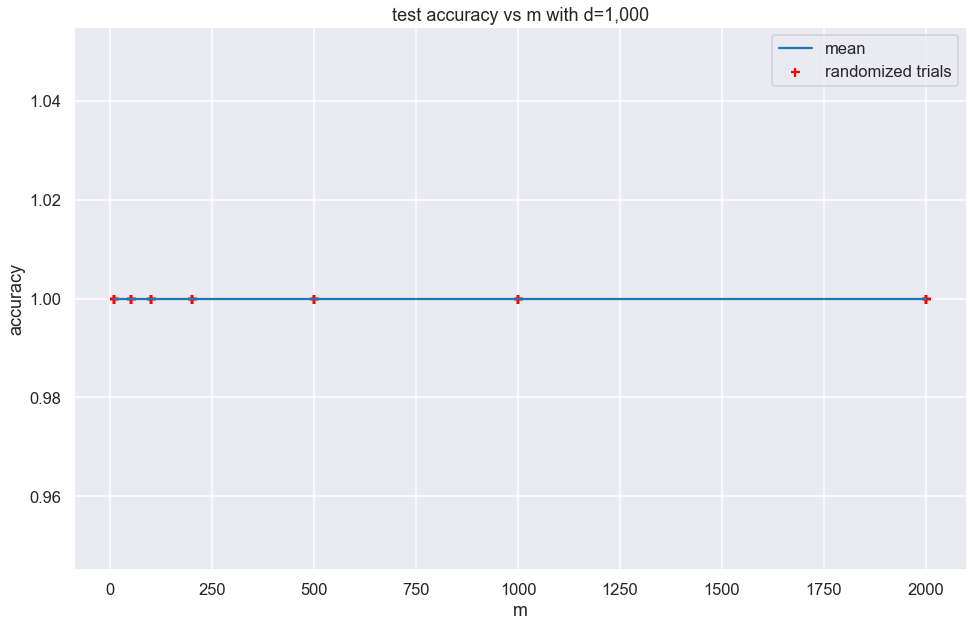

In [70]:
other_params_dict = {'bsize': 128, 'ntrain': 5000, 'm': Ms, 'd': 1000}
metric_key = 'accuracy'
param_key = 'm'
param_values = Ms
other_param_key = 'd'

plot_metric_vs_param_from_results(other_params_dict, all_results, metric_key, param_key, param_values, 
                                  other_param_key, figsize=(16, 10))

## 1.1 Accuracy vs d

Metric retrieval failed for d=5000 : 'bsize=128_ntrain=5000_d=5000_m=10'
Metric retrieval failed for d=10000 : 'bsize=128_ntrain=5000_d=10000_m=10'
Metric retrieval failed for d=256 : 'bsize=128_ntrain=5000_d=256_m=10'
Metric retrieval failed for d=128 : 'bsize=128_ntrain=5000_d=128_m=10'
Metric retrieval failed for d=50 : 'bsize=128_ntrain=5000_d=50_m=10'
Metric retrieval failed for d=25 : 'bsize=128_ntrain=5000_d=25_m=10'
Metric retrieval failed for d=20 : 'bsize=128_ntrain=5000_d=20_m=10'
Metric retrieval failed for d=15 : 'bsize=128_ntrain=5000_d=15_m=10'
Metric retrieval failed for d=10 : 'bsize=128_ntrain=5000_d=10_m=10'
Metric retrieval failed for d=5 : 'bsize=128_ntrain=5000_d=5_m=10'


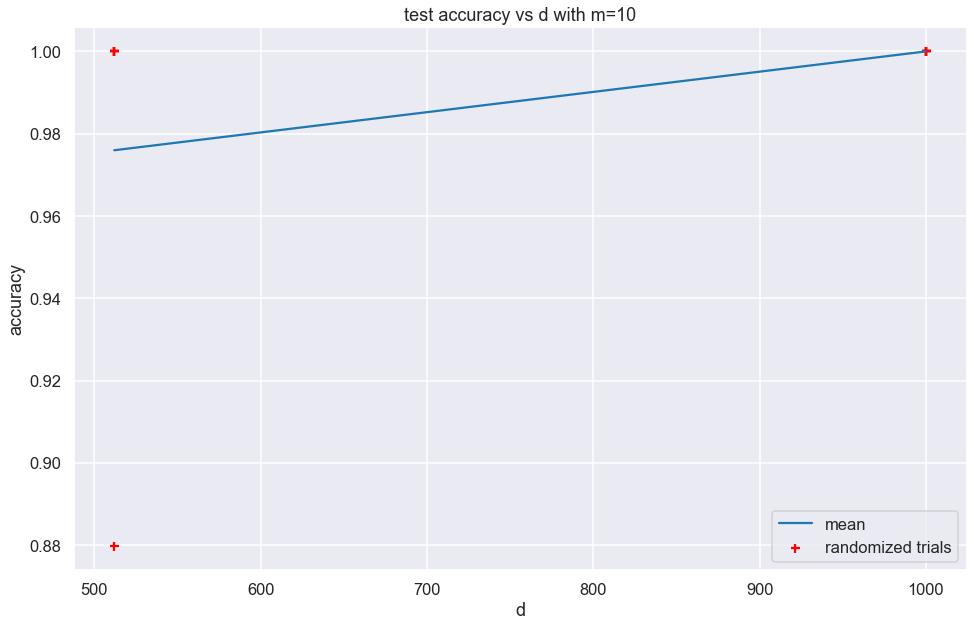

In [71]:
other_params_dict = {'bsize': 128, 'ntrain': 5000, 'd': Ds, 'm': 10}
metric_key = 'accuracy'
param_key = 'd'
param_values = Ds
other_param_key = 'm'

plot_metric_vs_param_from_results(other_params_dict, all_results, metric_key, param_key, param_values, 
                                  other_param_key, figsize=(16, 10))

# 2) Loss

## 2.1 Loss vs m

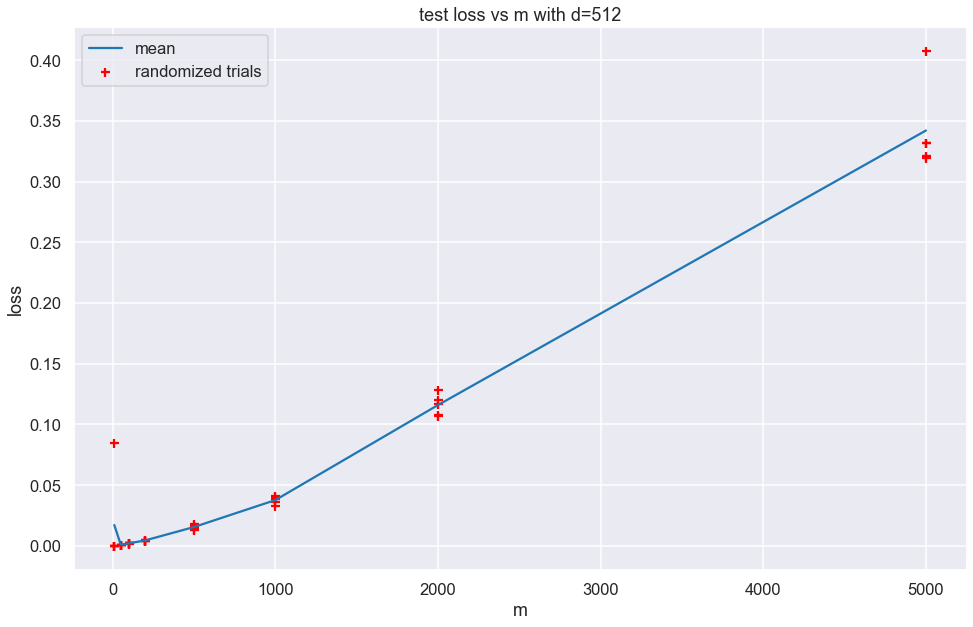

In [72]:
other_params_dict = {'bsize': 128, 'ntrain': 5000, 'm': Ms, 'd': 512}
metric_key = 'loss'
param_key = 'm'
param_values = Ms
other_param_key = 'd'

plot_metric_vs_param_from_results(other_params_dict, all_results, metric_key, param_key, param_values, 
                                  other_param_key, figsize=(16, 10))

Metric retrieval failed for m=5000 : list index out of range


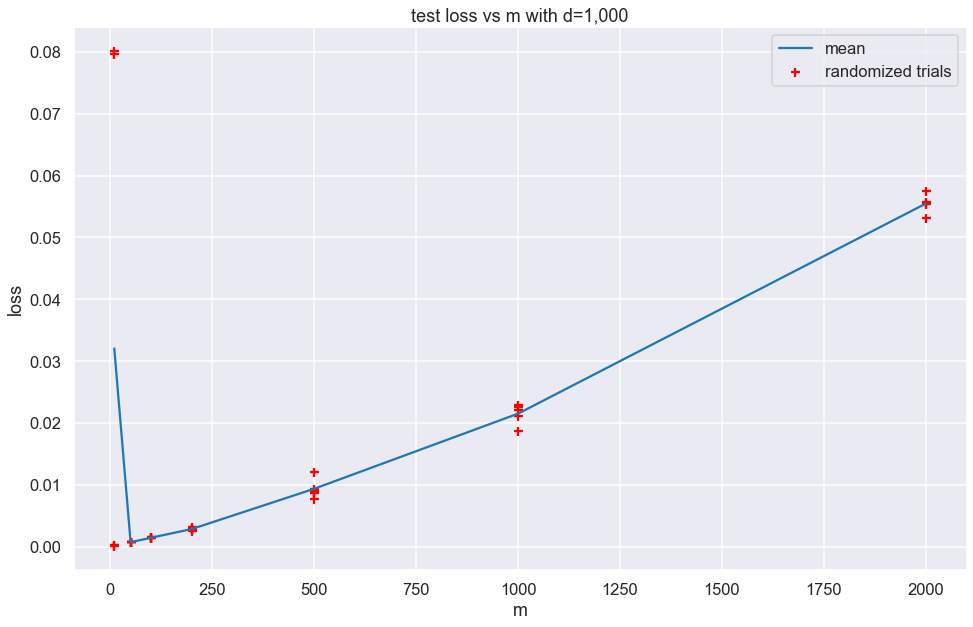

In [73]:
other_params_dict = {'bsize': 128, 'ntrain': 5000, 'm': Ms, 'd': 1000}
metric_key = 'loss'
param_key = 'm'
param_values = Ms
other_param_key = 'd'

plot_metric_vs_param_from_results(other_params_dict, all_results, metric_key, param_key, param_values, 
                                  other_param_key, figsize=(16, 10))

# 3) Margin

## 3.1. Margin vs m

#### Test

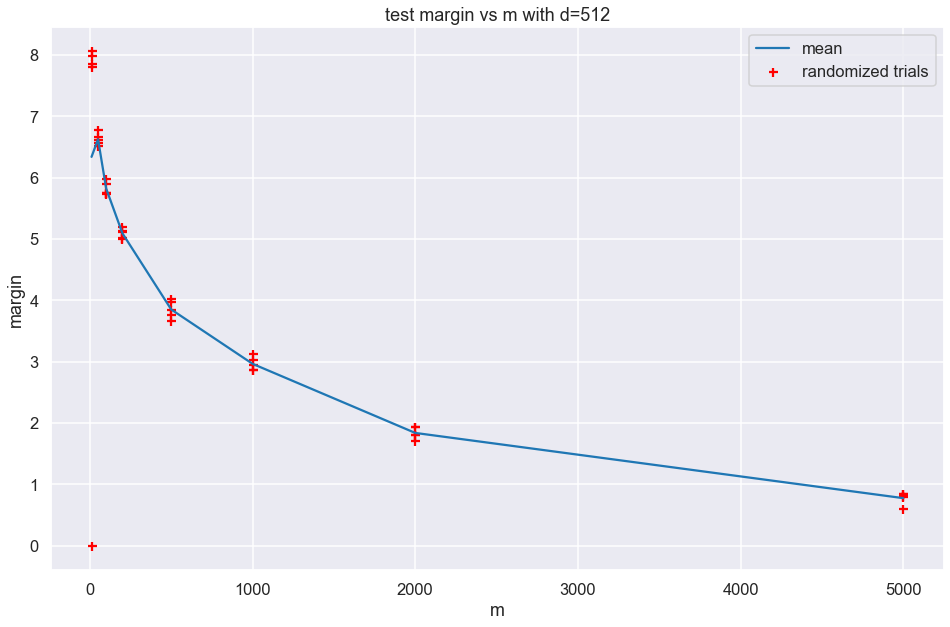

In [74]:
other_params_dict = {'bsize': 128, 'ntrain': 5000, 'm': Ms, 'd': 512}
metric_key = 'margin'
param_key = 'm'
param_values = Ms
other_param_key = 'd'

plot_metric_vs_param_from_results(other_params_dict, all_results, metric_key, param_key, param_values, 
                                  other_param_key, figsize=(16, 10))

Metric retrieval failed for m=5000 : list index out of range


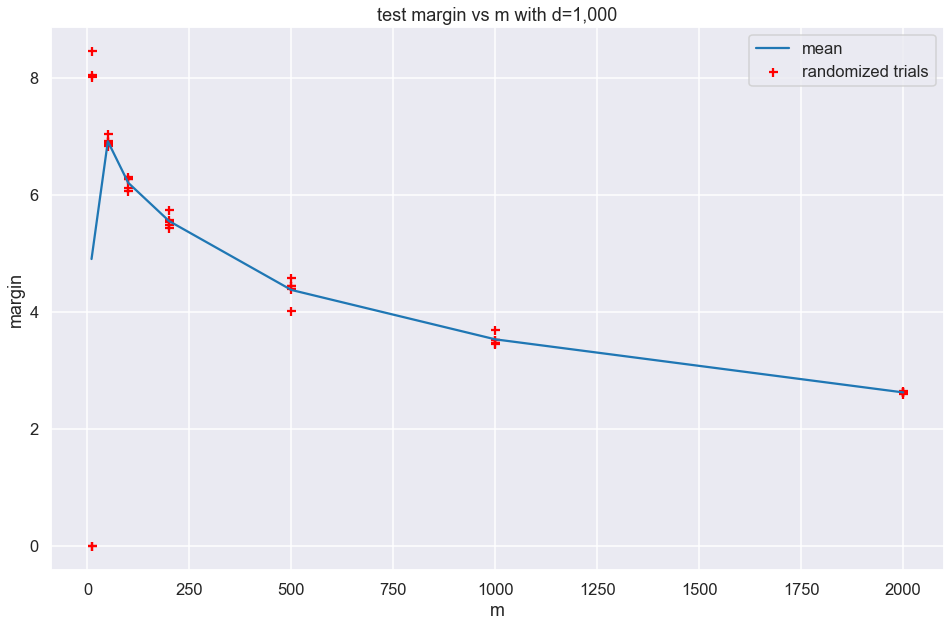

In [75]:
other_params_dict = {'bsize': 128, 'ntrain': 5000, 'm': Ms, 'd': 1000}
metric_key = 'margin'
param_key = 'm'
param_values = Ms
other_param_key = 'd'

plot_metric_vs_param_from_results(other_params_dict, all_results, metric_key, param_key, param_values, 
                                  other_param_key, figsize=(16, 10))

#### Training

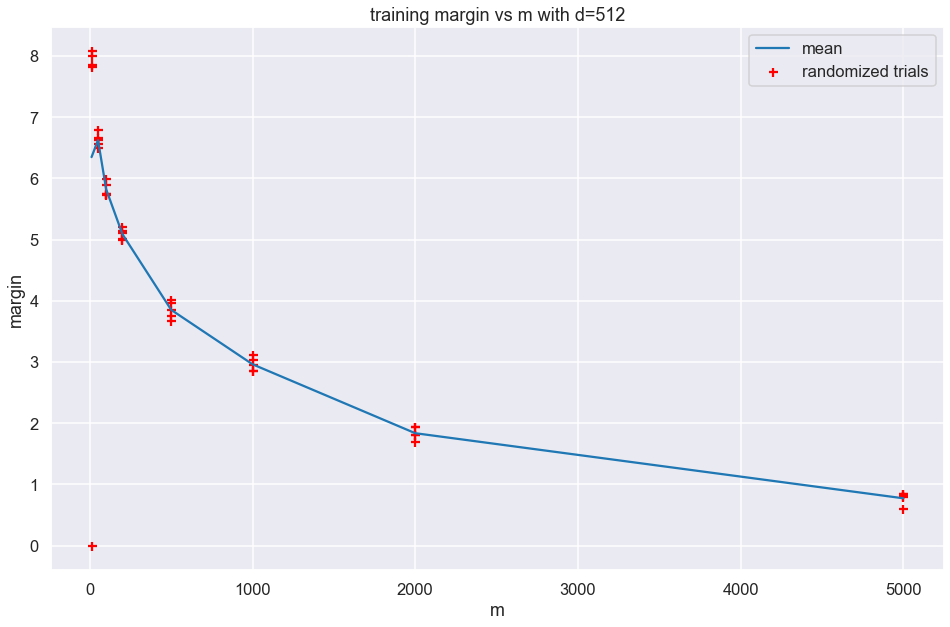

In [78]:
other_params_dict = {'bsize': 128, 'ntrain': 5000, 'm': Ms, 'd': 512}
metric_key = 'margin'
param_key = 'm'
param_values = Ms
other_param_key = 'd'

plot_metric_vs_param_from_results(other_params_dict, all_results, metric_key, param_key, param_values, 
                                  other_param_key, mode='training', figsize=(16, 10))

Metric retrieval failed for m=5000 : list index out of range


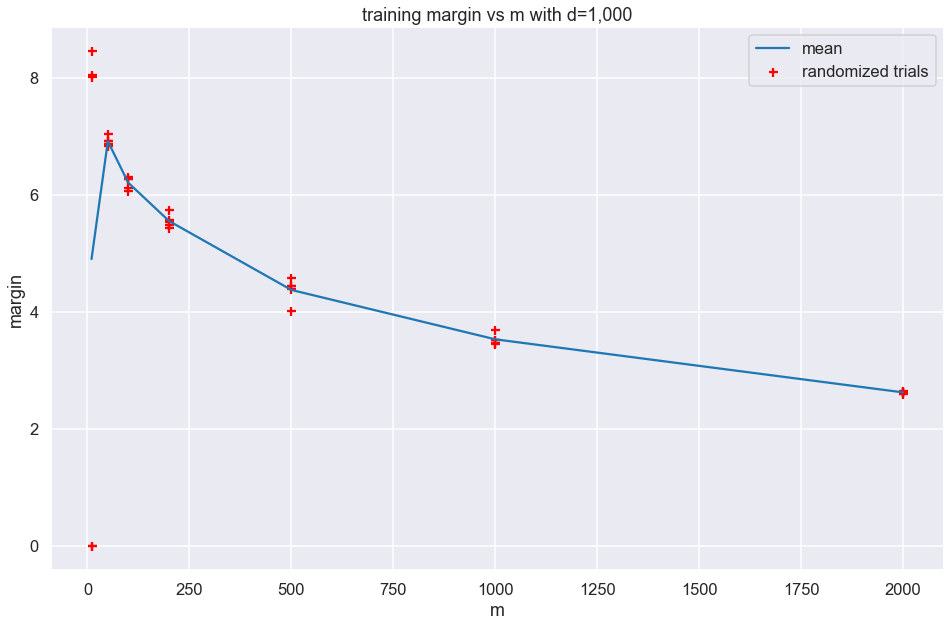

In [79]:
other_params_dict = {'bsize': 128, 'ntrain': 5000, 'm': Ms, 'd': 1000}
metric_key = 'margin'
param_key = 'm'
param_values = Ms
other_param_key = 'd'

plot_metric_vs_param_from_results(other_params_dict, all_results, metric_key, param_key, param_values, 
                                  other_param_key, mode='training', figsize=(16, 10))

# 4) Beta

### 4.1. Beta vs m

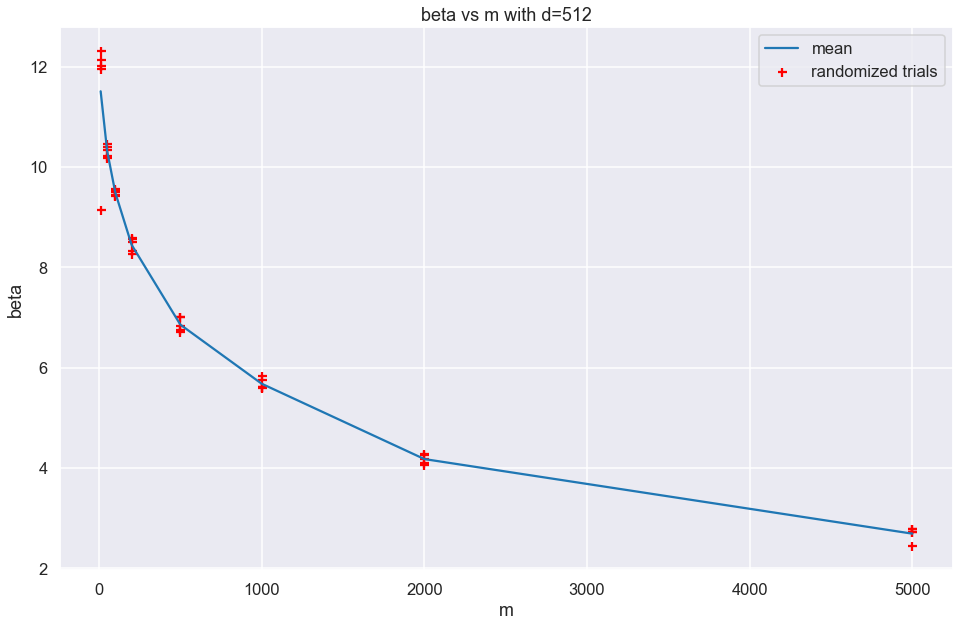

In [86]:
other_params_dict = {'bsize': 128, 'ntrain': 5000, 'm': Ms, 'd': 512}
metric_key = 'beta'
param_key = 'm'
param_values = Ms
other_param_key = 'd'

plot_metric_vs_param_from_results(other_params_dict, all_results, metric_key, param_key, param_values, 
                                  other_param_key, mode='training', figsize=(16, 10))

Metric retrieval failed for m=5000 : list index out of range


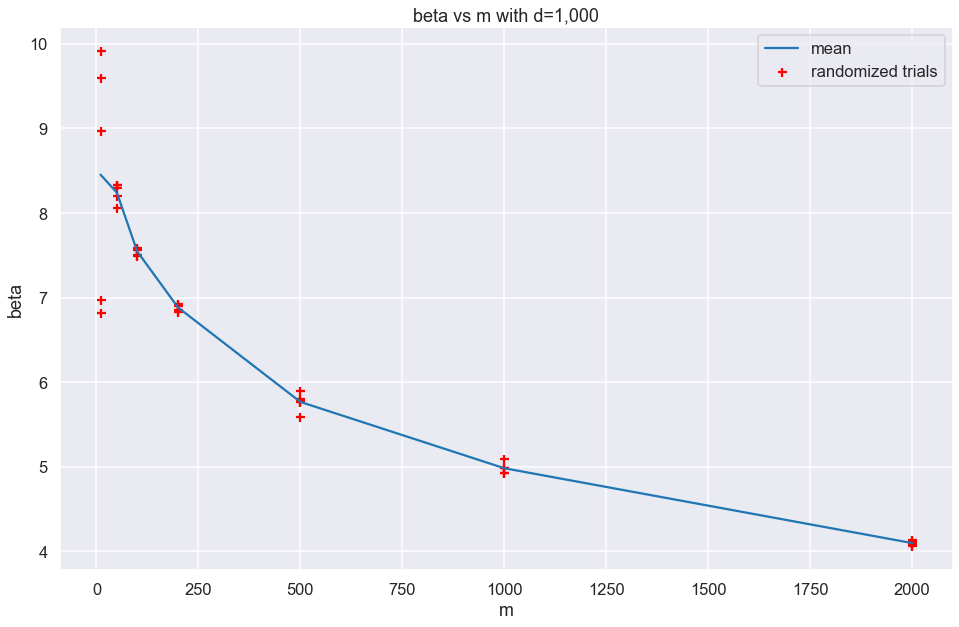

In [87]:
other_params_dict = {'bsize': 128, 'ntrain': 5000, 'm': Ms, 'd': 1000}
metric_key = 'beta'
param_key = 'm'
param_values = Ms
other_param_key = 'd'

plot_metric_vs_param_from_results(other_params_dict, all_results, metric_key, param_key, param_values, 
                                  other_param_key, mode='training', figsize=(16, 10))

# 5) Normalized margin

## 5.1. Normalized margin vs m

#### Test

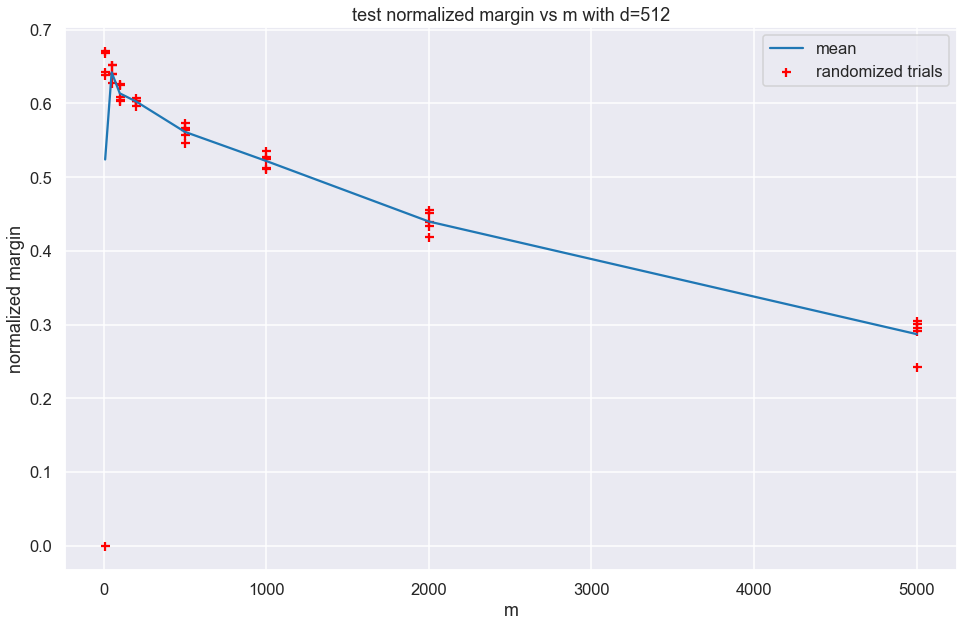

In [76]:
other_params_dict = {'bsize': 128, 'ntrain': 5000, 'm': Ms, 'd': 512}
metric_key = 'normalized_margin'
param_key = 'm'
param_values = Ms
other_param_key = 'd'

plot_metric_vs_param_from_results(other_params_dict, all_results, metric_key, param_key, param_values, 
                                  other_param_key, figsize=(16, 10))

Metric retrieval failed for m=5000 : list index out of range


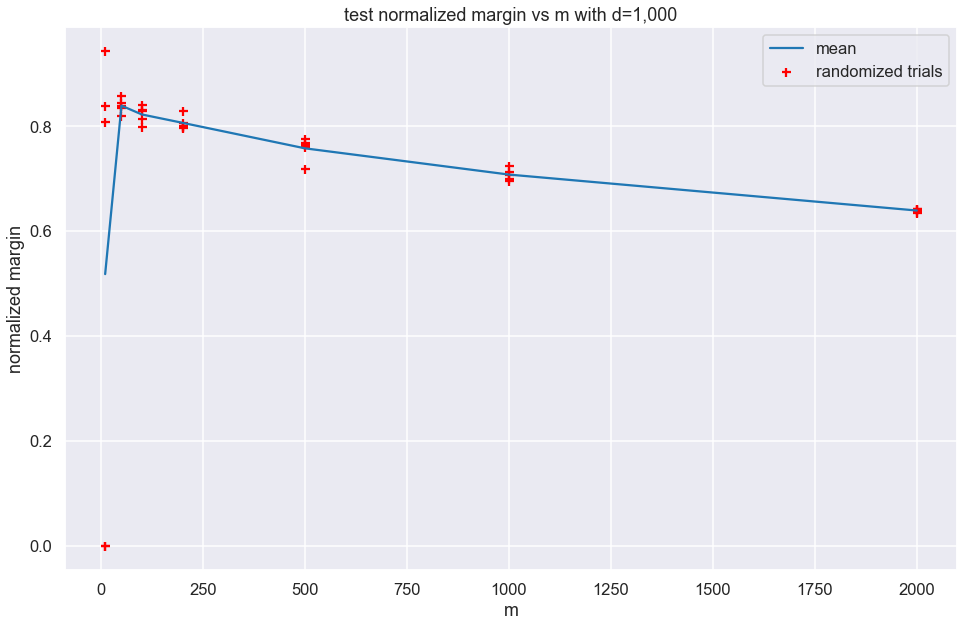

In [77]:
other_params_dict = {'bsize': 128, 'ntrain': 5000, 'm': Ms, 'd': 1000}
metric_key = 'normalized_margin'
param_key = 'm'
param_values = Ms
other_param_key = 'd'

plot_metric_vs_param_from_results(other_params_dict, all_results, metric_key, param_key, param_values, 
                                  other_param_key, figsize=(16, 10))

#### Training

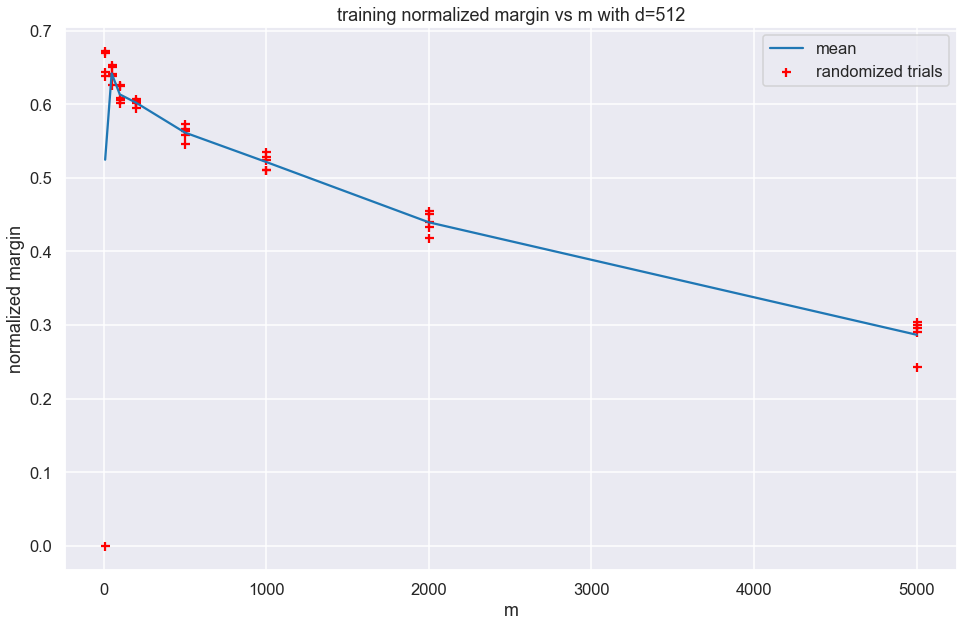

In [80]:
other_params_dict = {'bsize': 128, 'ntrain': 5000, 'm': Ms, 'd': 512}
metric_key = 'normalized_margin'
param_key = 'm'
param_values = Ms
other_param_key = 'd'

plot_metric_vs_param_from_results(other_params_dict, all_results, metric_key, param_key, param_values, 
                                  other_param_key, mode='training', figsize=(16, 10))

Metric retrieval failed for m=5000 : list index out of range


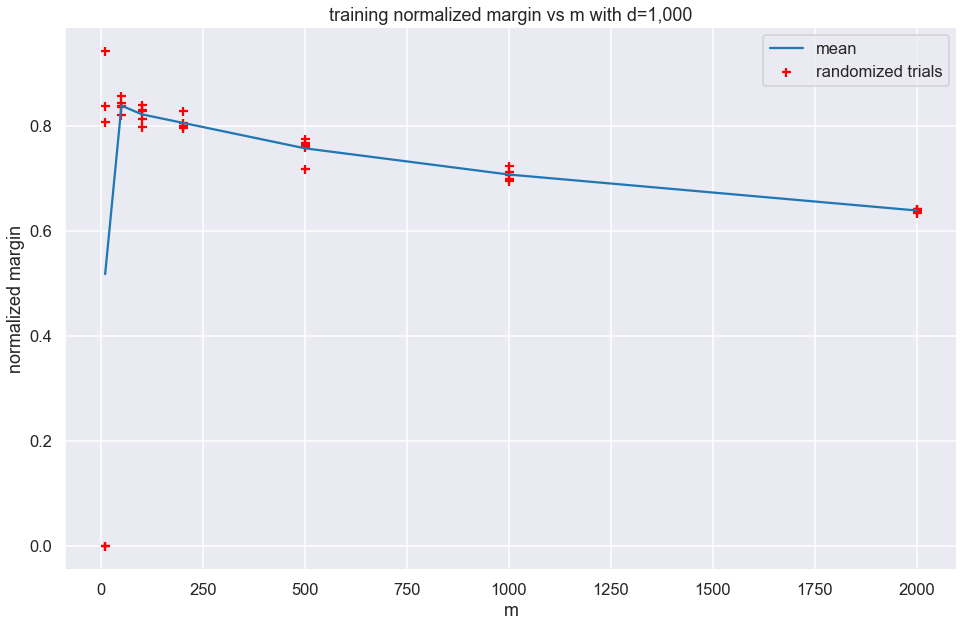

In [81]:
other_params_dict = {'bsize': 128, 'ntrain': 5000, 'm': Ms, 'd': 1000}
metric_key = 'normalized_margin'
param_key = 'm'
param_values = Ms
other_param_key = 'd'

plot_metric_vs_param_from_results(other_params_dict, all_results, metric_key, param_key, param_values, 
                                  other_param_key, mode='training', figsize=(16, 10))